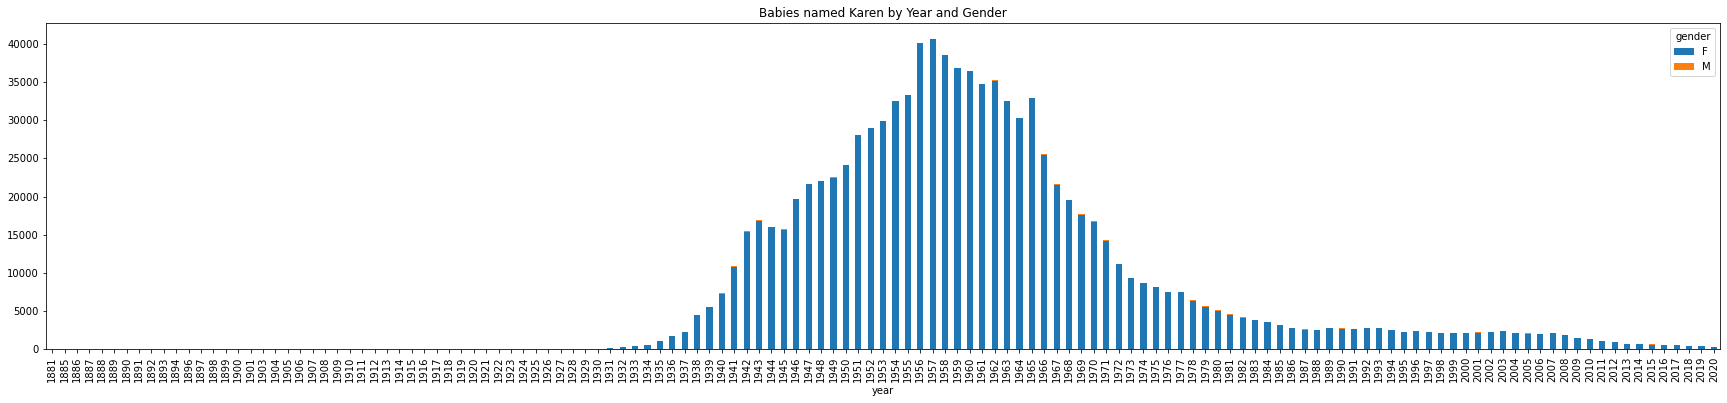

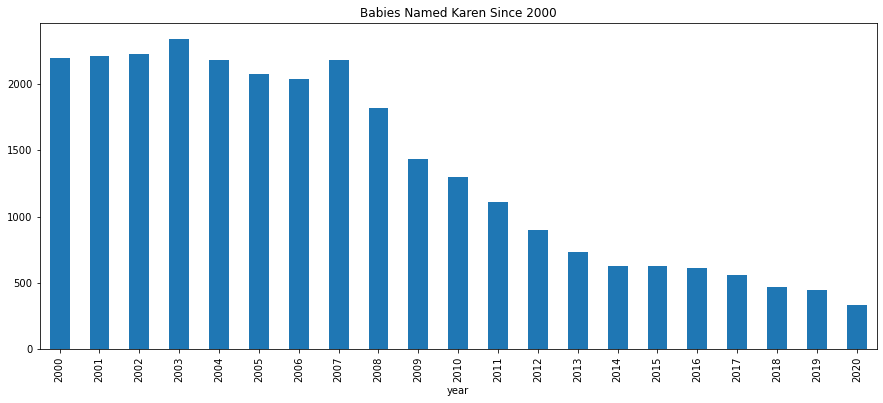

KeyError: 'year'

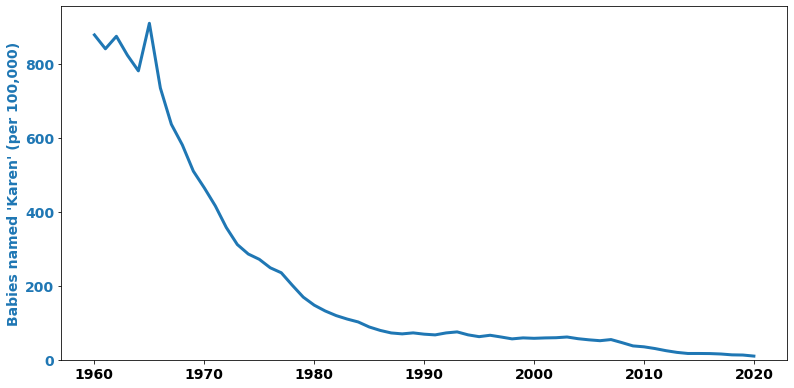

In [1]:
#  Call libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob

# Create list and count of filenames
file_list = sorted(glob.glob('ssn_names/yob*.txt'))
file_count = len(file_list)

# Initialize ssn_df
ssn_df = pd.DataFrame({
    'name':[],
    'gender':[],
    'count':[]
})


col_names = list(ssn_df.columns)

# Concatenate individual birth-year files together
for file_name in file_list:
    tmp_df = pd.read_csv(file_name, names = col_names)
    tmp_df["year"] = int(file_name[13:17])
    ssn_df = pd.concat([ssn_df, tmp_df], ignore_index = True)

# Preserve raw copy and save count and year variables in new df as integer types.
df = ssn_df.copy()
df["year"] = df["year"].astype(int)
df["count"] = df["count"].astype(int)


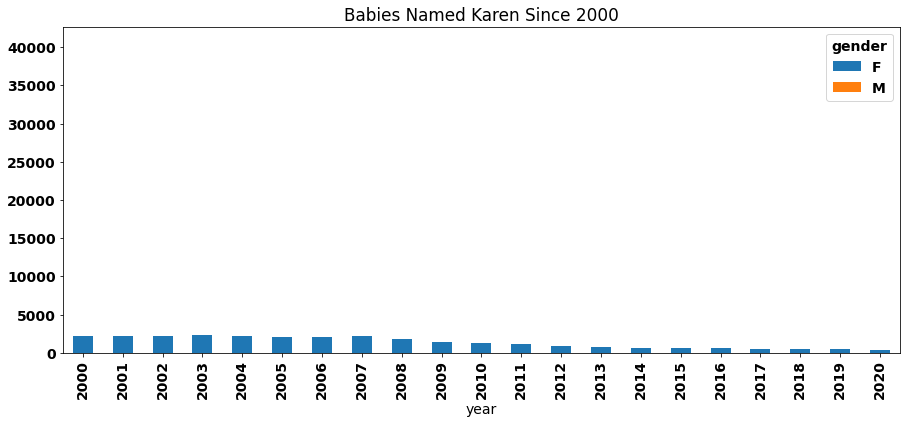

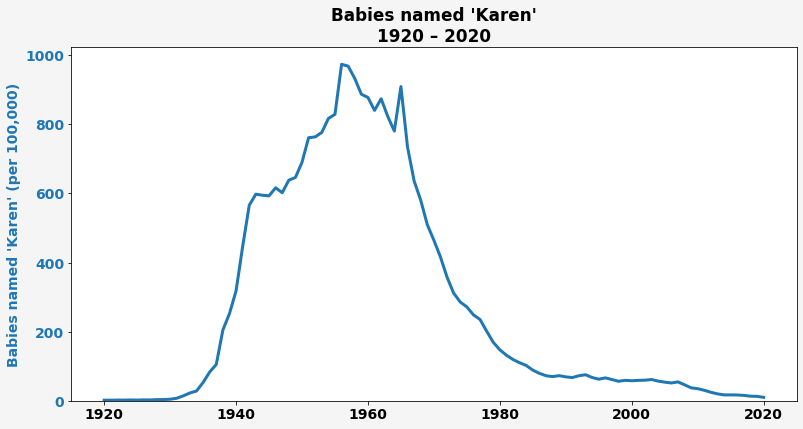

In [3]:
# Question:  How frequently is Karen given to baby girls vs baby boys?
df_karen = df[df["name"]=="Karen"].groupby(["year","gender"])["count"].sum().unstack().fillna(0)

df_karen.plot(kind = "bar", stacked = True, figsize=(30,6))

plt.title('Babies named Karen by Year and Gender')
plt.xticks(rotation=90, ha='center')

# plt.show()


# Specify year cutoff
YEAR_CUTOFF = 2000

# Add up boys and girls, and format total to show commas
df_karen["total"] = (df_karen["F"] + df_karen["M"]).astype("int")
df_karen['ticks'] = df_karen['total'].map('{:,d}'.format)

# Plot Total
df_karen["total"].loc[YEAR_CUTOFF:].plot(kind = "bar", 
                                         stacked = True, 
                                         use_index = True,
                                         figsize=(15,6)
                                        )

plt.title('Babies Named Karen Since '+str(YEAR_CUTOFF))
plt.xticks(rotation=90, ha='center')

#plt.show()


# Find total names per year
df_tot = pd.DataFrame(df.groupby(["year"])["count"].sum())
df_tot["all_names"] = df_tot["count"]

# Join all_names onto df_karen
df_karen = pd.concat([df_karen, df_tot], axis = 1)



# Find the relative popularity of Karen over time by dividing all "Karen's" by total names
df_karen["rel_freq"] = df_karen["total"] / df_karen["all_names"]

# For better interpretability, find # per 100,000 names
df_karen["per_100k"] = df_karen["rel_freq"] * 100000


# ## Create a Static Chart



# Graph "Karen's" per 100k 
# Choose chart cut_off
CHART_CUTOFF = 1920

df_chart = df_karen.loc[CHART_CUTOFF:]

# Choose font and line weight
font = {'weight' : 'bold',
        'size'   : 14}
plt.rc('font', **font)

linewidth = 3.0    
bg_col = 'whitesmoke'


# Graph names on the primary axis
fig, ax1 = plt.subplots(figsize = (13,6.5))
color = 'tab:blue'
ln1 = ax1.plot(df_chart.index, df_chart["per_100k"], color = color, linewidth = linewidth, label = 'Karen baby names')
ax1.set_ylabel("Babies named 'Karen' (per 100,000)", color = color, weight = 'bold')
ax1.tick_params(axis = 'y', labelcolor = color)
ax1.set_ylim(0, df_chart["per_100k"].max() * 1.05)

# Beautify the plot
# plt.xlim(df_chart['year'].min() - 1 , df_chart['year'].max() + 1)
plt.title("Babies named 'Karen'\n"+str(CHART_CUTOFF)+" – 2020", weight = 'bold')
fig.patch.set_facecolor(bg_col)

plt.show()
fig.savefig('karen.png')